In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [108]:
athlete_events = pd.read_csv("kaggle-csvs2/athlete_events.csv")
athlete_events = athlete_events.drop_duplicates()
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [109]:
athlete_events_condense = athlete_events[['Name','Sex','Age','Team','Games','City','Event','Medal',"Year"]]
athlete_events_condense.head()

,Name,Sex,Age,Team,Games,City,Event,Medal,Year
0,A Dijiang,M,24.0,China,1992 Summer,Barcelona,Basketball Men's Basketball,NaN,1992
1,A Lamusi,M,23.0,China,2012 Summer,London,Judo Men's Extra-Lightweight,NaN,2012
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,Antwerpen,Football Men's Football,NaN,1920
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,1900
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,Calgary,Speed Skating Women's 500 metres,NaN,1988


In [110]:
athlete_events_gold = athlete_events_condense[athlete_events_condense['Medal'] == "Gold"]
athlete_events_silver = athlete_events_condense[athlete_events_condense['Medal'] == "Silver"]
athlete_events_bronze = athlete_events_condense[athlete_events_condense['Medal'] == "Bronze"]
athlete_events_metalists = athlete_events_condense[
    (athlete_events_condense['Medal'] == "Bronze") |
    (athlete_events_condense['Medal'] == "Silver") |
    (athlete_events_condense['Medal'] == "Gold")
    ]

In [111]:
athlete_events_metalists

,Name,Sex,Age,Team,Games,City,Event,Medal,Year
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,1900
37,Arvo Ossian Aaltonen,M,30.0,Finland,1920 Summer,Antwerpen,Swimming Men's 200 metres Breaststroke,Bronze,1920
38,Arvo Ossian Aaltonen,M,30.0,Finland,1920 Summer,Antwerpen,Swimming Men's 400 metres Breaststroke,Bronze,1920
40,Juhamatti Tapio Aaltonen,M,28.0,Finland,2014 Winter,Sochi,Ice Hockey Men's Ice Hockey,Bronze,2014
41,Paavo Johannes Aaltonen,M,28.0,Finland,1948 Summer,London,Gymnastics Men's Individual All-Around,Bronze,1948
...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,Soviet Union,1956 Summer,Melbourne,Athletics Women's Shot Put,Silver,1956
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,Soviet Union,1964 Summer,Tokyo,Athletics Women's Shot Put,Bronze,1964
271082,Bogusaw Zych,M,28.0,Poland,1980 Summer,Moskva,"Fencing Men's Foil, Team",Bronze,1980
271102,Olesya Nikolayevna Zykina,F,19.0,Russia,2000 Summer,Sydney,Athletics Women's 4 x 400 metres Relay,Bronze,2000


In [112]:
age_average_metalists = pd.DataFrame(athlete_events_metalists.groupby('Year')['Age'].mean()).reset_index()
age_average_gold = pd.DataFrame(athlete_events_gold.groupby('Year')['Age'].mean()).reset_index()
age_average_silver = pd.DataFrame(athlete_events_silver.groupby('Year')['Age'].mean()).reset_index()
age_average_bronze = pd.DataFrame(athlete_events_bronze.groupby('Year')['Age'].mean()).reset_index()
age_average_all = pd.DataFrame(athlete_events.groupby('Year')['Age'].mean()).reset_index()


In [113]:
age_average_dataframe = pd.merge(age_average_metalists,age_average_gold, on="Year", suffixes=(' All Medalists', ' Gold'))
age_average_dataframe = pd.merge(age_average_dataframe,age_average_silver, on="Year")
age_average_dataframe = pd.merge(age_average_dataframe,age_average_bronze, on="Year")
age_average_dataframe = pd.merge(age_average_dataframe, age_average_all, on="Year")

age_average_dataframe = age_average_dataframe.rename(columns={"Age All Medalists": "All Medalists",
                                                              "Age Gold": "Gold", "Age_x": "Silver",
                                                              "Age_y": "Bronze", "Age": "All Athletes"})

age_average_dataframe.head()

,Year,All Medalists,Gold,Silver,Bronze,All Athletes
0,1896,23.217822,23.038462,23.896552,22.700000,23.580645
1,1900,28.297180,28.129944,28.032468,28.838462,28.881206
2,1904,26.485782,26.500000,26.718519,26.220472,26.698150
3,1906,26.931596,26.730159,27.173469,26.951807,27.125253
4,1908,27.739869,28.428070,27.423868,27.236287,26.995888


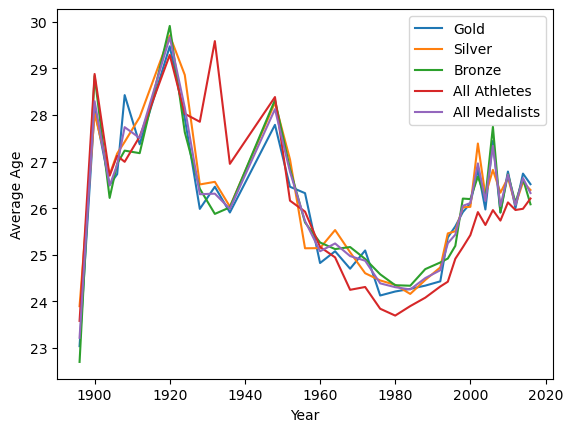

In [114]:
plt.plot(age_average_dataframe['Year'],age_average_dataframe['Gold'], label= 'Gold')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['Silver'], label= 'Silver')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['Bronze'], label= 'Bronze')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['All Athletes'], label= 'All Athletes')
plt.plot(age_average_dataframe['Year'],age_average_dataframe['All Medalists'], label= 'All Medalists')

plt.xlabel("Year")
plt.ylabel("Average Age")
plt.legend()
plt.show()

In [115]:
track_and_field_df = athlete_events[athlete_events["Sport"] == "Athletics"]

tnf_events_gold = track_and_field_df[track_and_field_df['Medal'] == "Gold"]
tnf_events_silver = track_and_field_df[track_and_field_df['Medal'] == "Silver"]
tnf_events_bronze = track_and_field_df[track_and_field_df['Medal'] == "Bronze"]
tnf_events_metalists = track_and_field_df[
    (track_and_field_df['Medal'] == "Bronze") |
    (track_and_field_df['Medal'] == "Silver") |
    (track_and_field_df['Medal'] == "Gold")
    ]

In [116]:
tnf_average_age_gold = pd.DataFrame(tnf_events_gold.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_silver = pd.DataFrame(tnf_events_silver.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_bronze = pd.DataFrame(tnf_events_bronze.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_all = pd.DataFrame(track_and_field_df.groupby('Year')['Age'].mean()).reset_index()
tnf_average_age_metalists = pd.DataFrame(tnf_events_metalists.groupby('Year')['Age'].mean()).reset_index()

In [117]:
age_average_dataframe_tnf = pd.merge(tnf_average_age_gold,tnf_average_age_silver, on="Year", suffixes=(' Gold', ' Silver'))
age_average_dataframe_tnf = pd.merge(age_average_dataframe_tnf,tnf_average_age_bronze, on="Year")
age_average_dataframe_tnf = pd.merge(age_average_dataframe_tnf,tnf_average_age_all, on="Year")
age_average_dataframe_tnf = pd.merge(age_average_dataframe_tnf, tnf_average_age_metalists, on="Year")

age_average_dataframe_tnf = age_average_dataframe_tnf.rename(columns={"Age Gold": "Gold", "Age Silver": "Silver", 
                                                                      "Age_x": "Bronze", "Age_y": "All Track & Field Athletes",
                                                                      "Age": "All Track & Field Medalists"})

age_average_dataframe_tnf.head()

,Year,Gold,Silver,Bronze,All Track & Field Athletes,All Track & Field Medalists
0,1896,21.916667,22.400000,23.000000,22.434783,22.344828
1,1900,24.148148,23.346154,22.909091,22.864486,23.506667
2,1904,24.571429,22.958333,23.090909,23.747191,23.608108
3,1906,26.428571,25.043478,23.842105,24.277955,25.142857
4,1908,25.705882,24.500000,24.363636,23.778561,24.861386


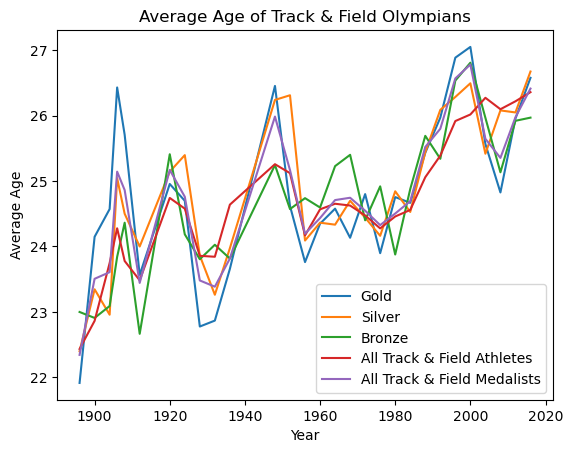

In [118]:
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['Gold'], label= 'Gold')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['Silver'], label= 'Silver')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['Bronze'], label= 'Bronze')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['All Track & Field Athletes'], label= 'All Track & Field Athletes')
plt.plot(age_average_dataframe_tnf['Year'],age_average_dataframe_tnf['All Track & Field Medalists'], label= 'All Track & Field Medalists')

plt.xlabel("Year")
plt.ylabel("Average Age")
plt.title("Average Age of Track & Field Olympians")
plt.legend()
plt.show()

In [119]:
# female and male comparison

female_data = athlete_events[athlete_events['Sex'] == 'F']
female_data = female_data.groupby('Year')['Sex'].count()
female_data = pd.DataFrame(female_data).reset_index()
female_data.rename(columns={'Sex':'Female'}, inplace=True)
male_data = athlete_events[athlete_events['Sex'] == 'M']
male_data = male_data.groupby('Year')['Sex'].count()
male_data = pd.DataFrame(male_data).reset_index()
male_data.rename(columns={'Sex':'Male'}, inplace=True)
gender_data_merge = pd.merge(female_data,male_data,on='Year',how='right')
gender_data_merge.tail()

,Year,Female,Male
30,2008,5816.0,7786
31,2010,1847.0,2555
32,2012,5815.0,7105
33,2014,2023.0,2868
34,2016,6223.0,7465


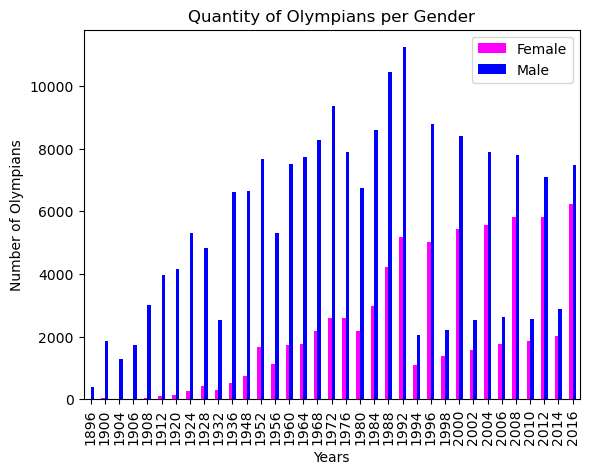

In [120]:
# gender break down per total number of olympians
colors = ['magenta','blue']
ax = gender_data_merge.plot(x='Year', y=['Female', 'Male'], kind='bar',color=colors)
plt.ylabel('Number of Olympians')
plt.xlabel('Years')
plt.title('Quantity of Olympians per Gender')
plt.legend()
plt.show()

In [121]:
# female and male comparison

usa_events = athlete_events[athlete_events['Team'] == 'United States']
female_data = usa_events[usa_events['Sex'] == 'F']
female_data = female_data.groupby('Year')['Sex'].count()
female_data = pd.DataFrame(female_data).reset_index()
female_data.rename(columns={'Sex':'Female'}, inplace=True)
male_data = usa_events[usa_events['Sex'] == 'M']
male_data = male_data.groupby('Year')['Sex'].count()
male_data = pd.DataFrame(male_data).reset_index()
male_data.rename(columns={'Sex':'Male'}, inplace=True)
gender_data_merge_usa = pd.merge(female_data,male_data,on='Year',how='right')
gender_data_merge_usa.tail()

,Year,Female,Male
30,2008,356.0,388
31,2010,134.0,169
32,2012,333.0,336
33,2014,147.0,186
34,2016,359.0,340


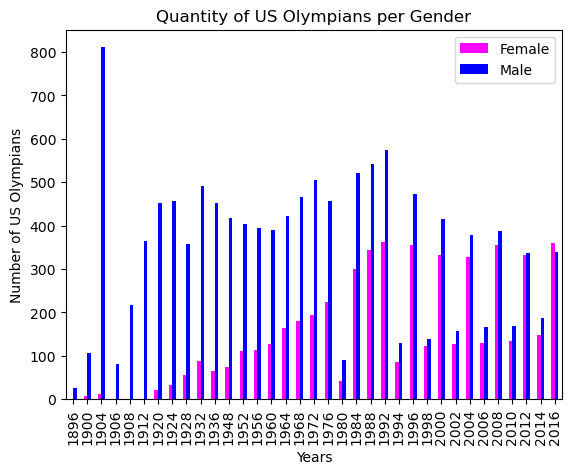

In [122]:
# Gender Break Down for the United States
colors = ['magenta','blue']
ax = gender_data_merge_usa.plot(x='Year', y=['Female', 'Male'], kind='bar',color=colors)
plt.ylabel('Number of US Olympians')
plt.xlabel('Years')
plt.title('Quantity of US Olympians per Gender')
plt.legend()
plt.show()

In [123]:

france_data = athlete_events_condense[athlete_events_condense['Team'] == 'France']
female_data = france_data[france_data['Sex'] == 'F']
female_data = female_data.groupby('Year')['Sex'].count()
female_data = pd.DataFrame(female_data).reset_index()
female_data.rename(columns={'Sex':'Female'}, inplace=True)
male_data = france_data[france_data['Sex'] == 'M']
male_data = male_data.groupby('Year')['Sex'].count()
male_data = pd.DataFrame(male_data).reset_index()
male_data.rename(columns={'Sex':'Male'}, inplace=True)
gender_data_merge_france = pd.merge(female_data,male_data,on='Year',how='right')
gender_data_merge_france.tail()

,Year,Female,Male
30,2008,181.0,260
31,2010,69.0,123
32,2012,183.0,239
33,2014,72.0,117
34,2016,215.0,289


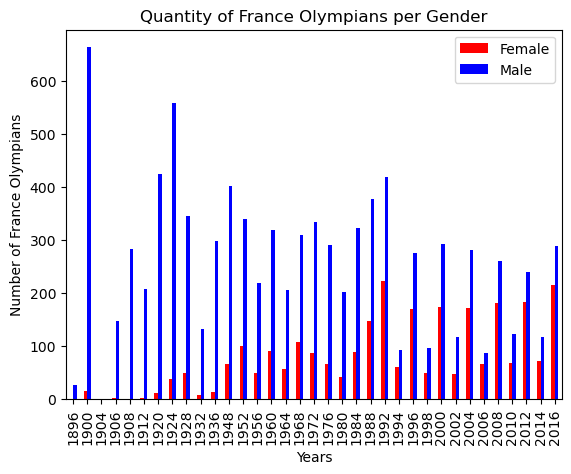

In [124]:
# Gender Break Down for the France
colors = ['red','blue']
ax = gender_data_merge_france.plot(x='Year', y=['Female', 'Male'], kind='bar',color=colors)
plt.ylabel('Number of France Olympians')
plt.xlabel('Years')
plt.title('Quantity of France Olympians per Gender')
plt.legend()
plt.show()

In [125]:
# female and male comparison in Track and Field

female_data = track_and_field_df[track_and_field_df['Sex'] == 'F']
female_data = female_data.groupby('Year')['Sex'].count()
female_data = pd.DataFrame(female_data).reset_index()
female_data.rename(columns={'Sex':'Female'}, inplace=True)
male_data = track_and_field_df[track_and_field_df['Sex'] == 'M']
male_data = male_data.groupby('Year')['Sex'].count()
male_data = pd.DataFrame(male_data).reset_index()
male_data.rename(columns={'Sex':'Male'}, inplace=True)
gender_data_tnf = pd.merge(female_data,male_data,on='Year',how='right')
gender_data_tnf.tail()

,Year,Female,Male
24,2000,1031.0,1437
25,2004,1001.0,1174
26,2008,1068.0,1176
27,2012,1097.0,1181
28,2016,1208.0,1300


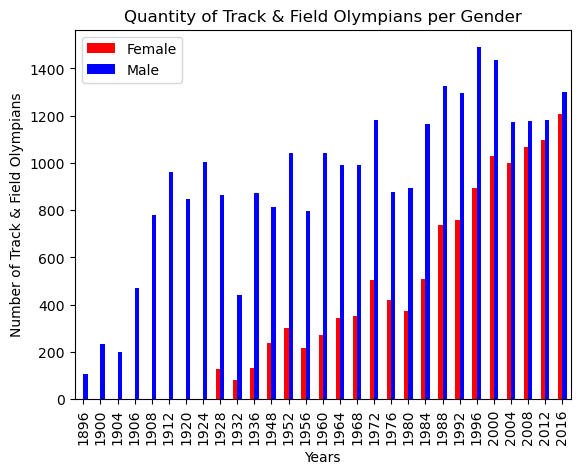

In [126]:
# Gender Break Down for the France
colors = ['red','blue']
ax = gender_data_tnf.plot(x='Year', y=['Female', 'Male'], kind='bar',color=colors)
plt.ylabel('Number of Track & Field Olympians')
plt.xlabel('Years')
plt.title('Quantity of Track & Field Olympians per Gender')
plt.legend()
plt.show()